# ML Project 1
## Comparing various machine learning techniques using the real estate data set.

In [5]:
import pandas as pd # type: ignore
data = pd.read_csv("C:\\Users\\AdityaTheEmp\\Desktop\\Projects\\Machine learning projects\\Comparing various machine learning models\\Real_Estate.csv")
#display the first few rows:
data_head = data.head()
print(data_head)

             Transaction date  House age  Distance to the nearest MRT station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144   
2  2012-09-05 01:10:52.349449        1.1                            1978.6710   
3  2012-09-05 13:26:01.189083       22.2                            1055.0670   
4  2012-09-06 08:29:47.910523        8.5                             967.4000   

   Number of convenience stores   Latitude   Longitude  \
0                             8  25.007059  121.561694   
1                             2  25.012148  121.546990   
2                            10  25.003850  121.528336   
3                             5  24.962887  121.482178   
4                             6  25.011037  121.479946   

   House price of unit area  
0                  6.488673  
1                 24.970725  
2                 26.694267  
3                 38.091638  
4             

In [6]:
#we shall now print the data info:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
None


In [7]:
from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.preprocessing import StandardScaler  # type: ignore
import datetime

In [8]:
#converting the transaction column to datetime format:
data['Transaction date'] = pd.to_datetime(data['Transaction date'])
#dt.year extracts the year from the column entries, basically.
data['Transaction year']= data['Transaction date'].dt.year
#dt.month is the same but with months
data['Transaction month'] = data['Transaction date'].dt.month

In [9]:
#since we have extracted the relevant information into new columns, we shall drop the transaction date column:
data = data.drop(columns = ["Transaction date"])

In [10]:
#define the features and target variable:
X = data.drop('House price of unit area', axis = 1)
y = data['House price of unit area']

In [11]:
#split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Using the `train_test_split` function, we are splitting the dataset into 20% testing and 80% training split.
Next, we normaliza, or scale, the data in order to make it comparable and more standardized for machine learning.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(331, 7)

The output tells us that the dimensions of the scaled training dataset is 331 rows and 7 columns.

In [13]:
X_test_scaled.shape

(83, 7)

The dimensions of the test dataset are 83 rows and 7 columns.

## We shall now start with training multiple models and comparing their performance. These are the four models that we shall use:
### 1. Linear regression
### 2. Decision tree regressor
### 3. Random forest resgressor
### 4. Gradient boosting regressor

### We will evaluate their performance using mean absolute error and R squared as metrics.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [16]:
# dictionary to hold the evaluation metrics for each model
results = {}

In [17]:
for name, model in models.items():
    # training the model
    model.fit(X_train_scaled, y_train)

    # making predictions on the test set
    predictions = model.predict(X_test_scaled)

    # calculating evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # storing the metrics
    results[name] = {"MAE": mae, "R²": r2}

results_df = pd.DataFrame(results).T  # convert the results to a DataFrame for better readability
print(results_df)

                         MAE        R²
Linear Regression   9.748246  0.529615
Decision Tree      11.760342  0.204962
Random Forest       9.887601  0.509547
Gradient Boosting  10.000117  0.476071


In the code cell above, we first intitialize a dictionary of the four machine learning models that we are comparing. Then, in the loop, we are basically telling python to iterate through each model in the dictionary named model. The `fit()` function is used to fit the data to the specified models. Then we calculate the evaluation metrics and finally, store the results in a dataframe.

In [18]:
styled_table = results_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', 'white')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'tr:hover', 'props': [('background-color', 'lightyellow')]},
])

# Display the styled table
styled_table

,MAE,R²
Linear Regression,9.748246,0.529615
Decision Tree,11.760342,0.204962
Random Forest,9.887601,0.509547
Gradient Boosting,10.000117,0.476071


Using AI, I tried to apply custom CSS to display the results in a better looking format. 
As seen from the results, it is evident that **Linear Regression** is the best model for the given dataset, with an $R^2$ value of 0.52. 
Decision Tree Regressor shows the highest MAE (11.76) and the lowest $R^2$ (0.20), indicating it may be overfitting to the training data and performing poorly on the test data. On the other hand, Random Forest Regressor and Gradient Boosting Regressor have similar MAEs (9.89 and 10.00, respectively) and $R^2$ scores (0.51 and 0.48, respectively), performing slightly worse than the Linear Regression model but better than the Decision Tree.

Now, we shall try to visualize the decision tree regressor.

In [19]:
from sklearn.tree import export_graphviz

In [27]:
model2 = DecisionTreeRegressor(random_state= 44) #random_state ensures the same randomization order every time we perfrom the experiment
model2.fit(X_train_scaled, y_train)
model2.predict(X_test_scaled)


array([25.98841826, 21.22293983, 24.97072465, 39.52934393, 16.6927426 ,
       15.4729221 , 19.59263558, 18.70607451, 33.16993857,  0.        ,
       28.95693856, 44.11658501, 22.49146982, 42.75258978, 34.91191452,
       37.24170556, 31.86071601, 16.6927426 , 37.24170556, 28.39451475,
       29.76962852, 59.33493772, 13.84893727, 42.75258978, 26.24541361,
       29.72105262, 22.49146982,  8.11229195, 60.46035153, 13.06073818,
       30.85539137, 36.32604829, 57.02314443, 57.93798973, 26.75930501,
       45.34845422, 22.91559838, 35.13161908, 33.66850037, 25.2856203 ,
       33.4417429 , 26.78236924,  0.        ,  0.        , 28.72611053,
        9.42627181, 33.20955519, 37.16632244,  0.        , 17.8779668 ,
        0.        , 29.72105262, 43.78332661, 41.78517079, 35.25220099,
       13.67353159, 45.80993752, 46.54003257, 57.02314443, 13.67353159,
       24.03759221, 25.58971056, 40.76480979, 46.26609679, 22.75869286,
        9.42627181, 33.4417429 , 47.25603168, 40.65124852, 43.61

In [35]:
from matplotlib import pyplot as plt
from sklearn import tree
!pip install graphviz

     ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00


[Text(0.7010301543445122, 0.9761904761904762, 'x[1] <= 0.799\nsquared_error = 239.594\nsamples = 331\nvalue = 28.758'),
 Text(0.453076568851626, 0.9285714285714286, 'x[2] <= 0.104\nsquared_error = 173.224\nsamples = 276\nvalue = 32.63'),
 Text(0.255174987296748, 0.8809523809523809, 'x[1] <= -0.318\nsquared_error = 164.068\nsamples = 136\nvalue = 27.953'),
 Text(0.1414475355691057, 0.8333333333333334, 'x[2] <= -1.329\nsquared_error = 141.796\nsamples = 103\nvalue = 30.996'),
 Text(0.07611788617886178, 0.7857142857142857, 'x[4] <= 0.934\nsquared_error = 151.543\nsamples = 28\nvalue = 25.172'),
 Text(0.051422764227642276, 0.7380952380952381, 'x[6] <= 0.788\nsquared_error = 131.36\nsamples = 24\nvalue = 27.682'),
 Text(0.021544715447154472, 0.6904761904761905, 'x[3] <= -1.273\nsquared_error = 118.639\nsamples = 18\nvalue = 24.994'),
 Text(0.0065040650406504065, 0.6428571428571429, 'x[1] <= -0.661\nsquared_error = 6.079\nsamples = 4\nvalue = 14.606'),
 Text(0.0032520325203252032, 0.59523809

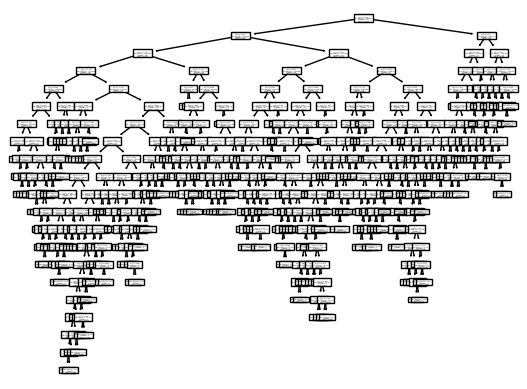

In [33]:
tree.plot_tree(model2)